In [328]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [329]:
# initial set up from previous assignment

df = pd.read_csv("titanic.csv")

if df['Age'].isna().sum().sum() > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())

df = df.drop_duplicates()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Task 1: Data transformation

In [330]:
# question 1

df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [331]:
# question 2

bins = [0, 10, 20, 30, 50, np.inf]
labels = ['Free', 'Low', 'Medium', 'High', 'OverPriced']

df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Free
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,OverPriced
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Free
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,OverPriced
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Free


In [332]:
print(f"Number of tickets that lie in the [30, 50) bracket: {(df['FareCategory'] == 'High').sum()}")

Number of tickets that lie in the [30, 50) bracket: 74


In [333]:
# question 3

df['Title'] = df['Name'].str.split(",").str[1].str.split(".").str[0].str.strip()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FareCategory,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Free,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,OverPriced,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Free,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,OverPriced,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Free,Mr


# Task 2: Data reduction

In [334]:
# quesition 1

# We drop passengerId for obvious reasons.
# We drop Parch and SibDip since we are combining them together to make a better variable that holds the imformation for both.
# We drop embarked since it does not make any sense that the starting locations of each passeneger might affect their survival rate down the line.
# We drop Cabin since there are so many missing values for it. Almost all of the rows have no Cabin data.
# We drop Ticket since the Fare and FareCategory featuers seem to be stronger indicators of 'class' in my opinion.

labels = ['PassengerId', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Title', 'FareCategory', 'Embarked']
df = df.drop(labels=labels, axis=1)
display(df.head())

,Survived,Pclass,Name,Sex,Age,Fare,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0


In [335]:
# question 2a

# need to encode the 'Sex' variable
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])


def get_best_features(n):
    corr_matrix = df.corr().abs()
    top_correlated = corr_matrix.nlargest(n+1, "Survived")["Survived"].index
    df_top = pd.DataFrame(data=top_correlated, columns=['Top Features'])
    return df_top

best = get_best_features(5)
display(best)


C:\Users\timfi\AppData\Local\Temp\ipykernel_26284\121575000.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,Top Features
0,Survived
1,Sex
2,Pclass
3,Fare
4,Age
5,FamilySize


<Axes: >

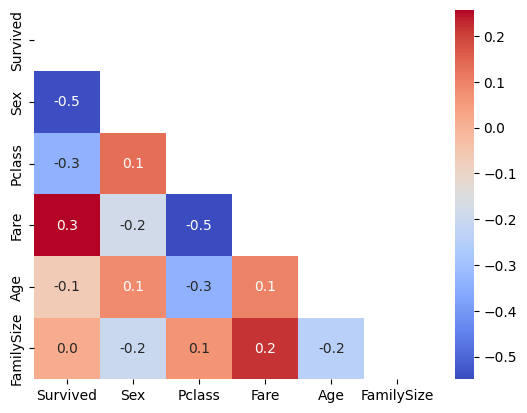

In [336]:
# question 2b

top_corr_matrix = df[best['Top Features']].corr()
mask = np.zeros_like(top_corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(top_corr_matrix, annot=True, fmt='.1f', cmap="coolwarm", mask=mask)

# Task 3: Data formatting and validation

See attached Task_3.pdf